# MyProtein Impact Whey Protein - Flavor rating survey 2018

Visualizations of [AsparagusSoupXB1](https://old.reddit.com/user/AsparagusSoupXB1)'s [taste-test survey results](https://old.reddit.com/r/fitmeals/comments/84gcxu/myprotein_impact_whey_protein_flavor_rating/?sort=confidence)

In [193]:
import pandas as pd

df = pd.read_csv('myprotein.tsv',sep='\t',index_col='Flavour')

In [194]:
def plot(df):
    df.plot.barh(stacked=True, figsize=(14,25))

# Flavours sorted by number of votes (of any type) cast for it 

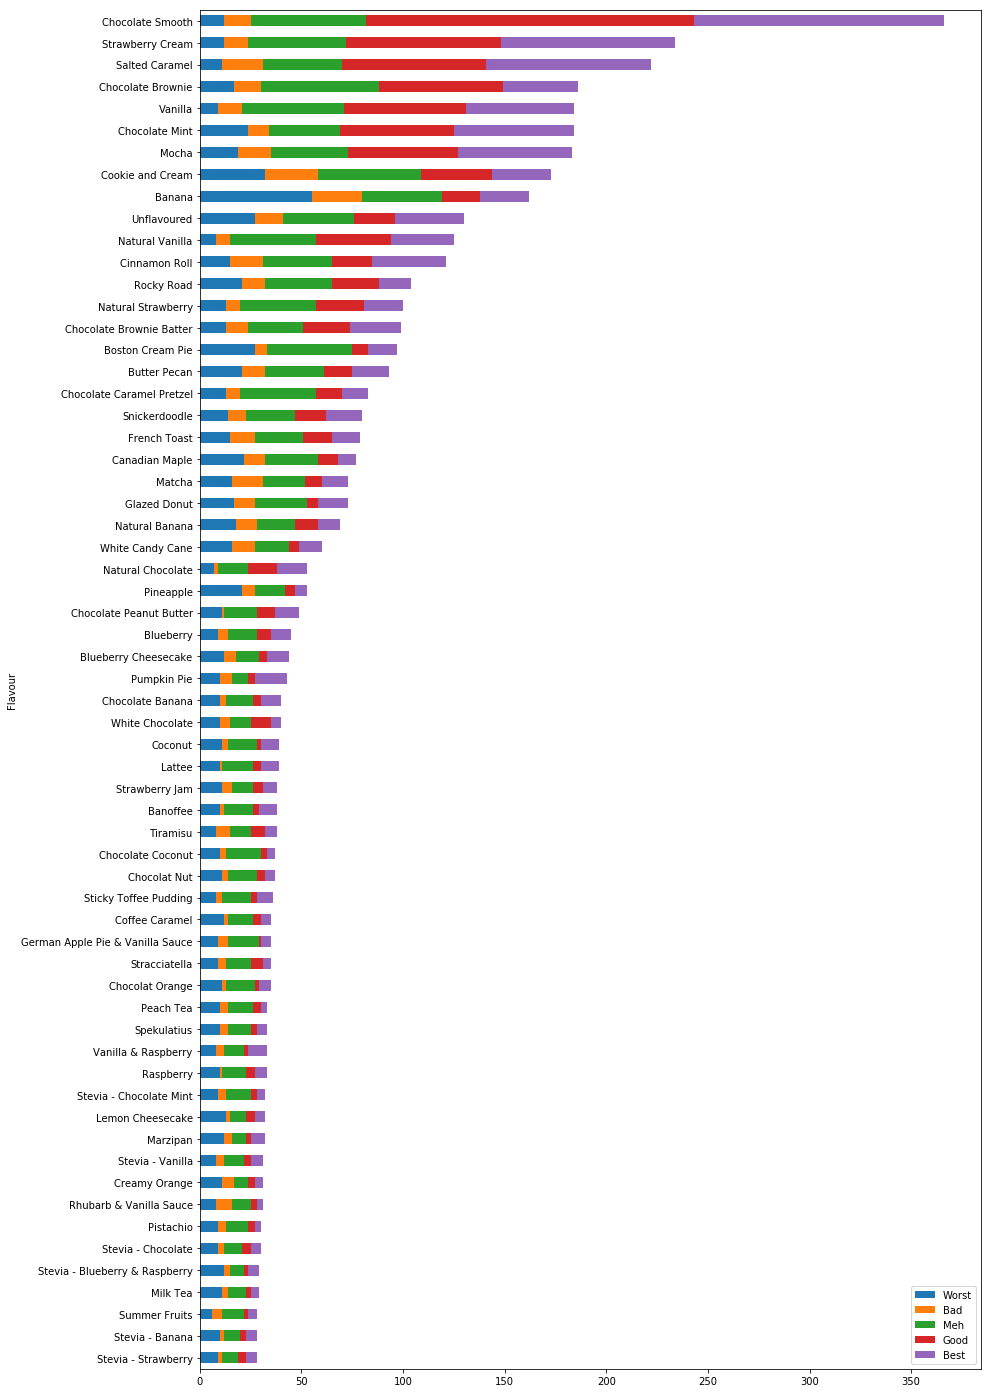

In [195]:
df.loc[ df.sum(axis=1).sort_values(ascending=True).index ].pipe( plot )

# Flavours sorted by most "Best" votes

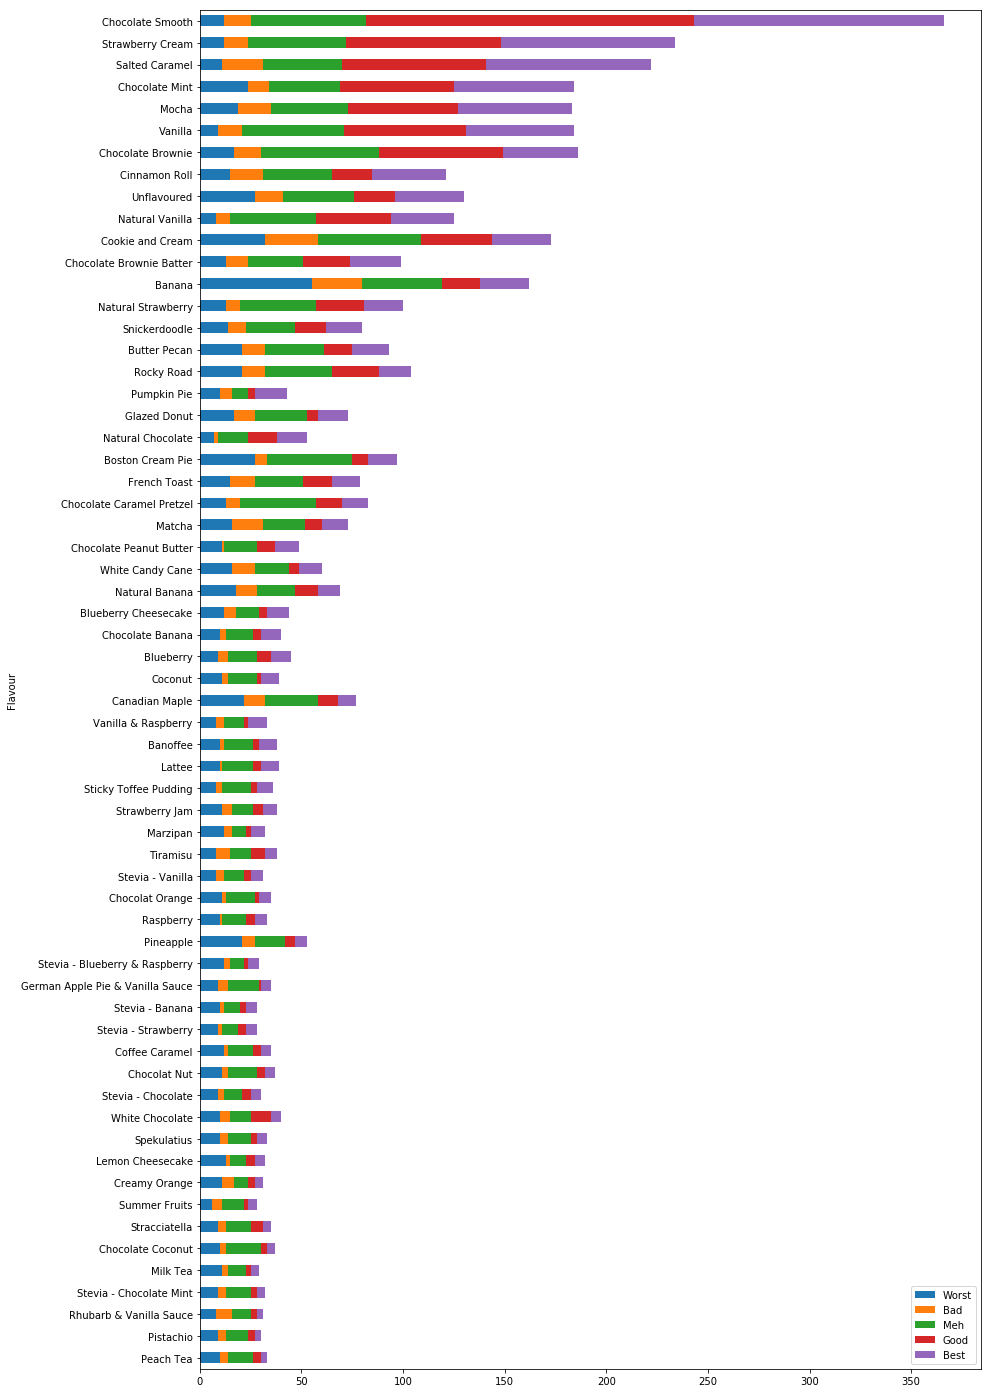

In [196]:
df.sort_values('Best',ascending=True).pipe(plot)

# Flavours sorted by most "Worst" votes

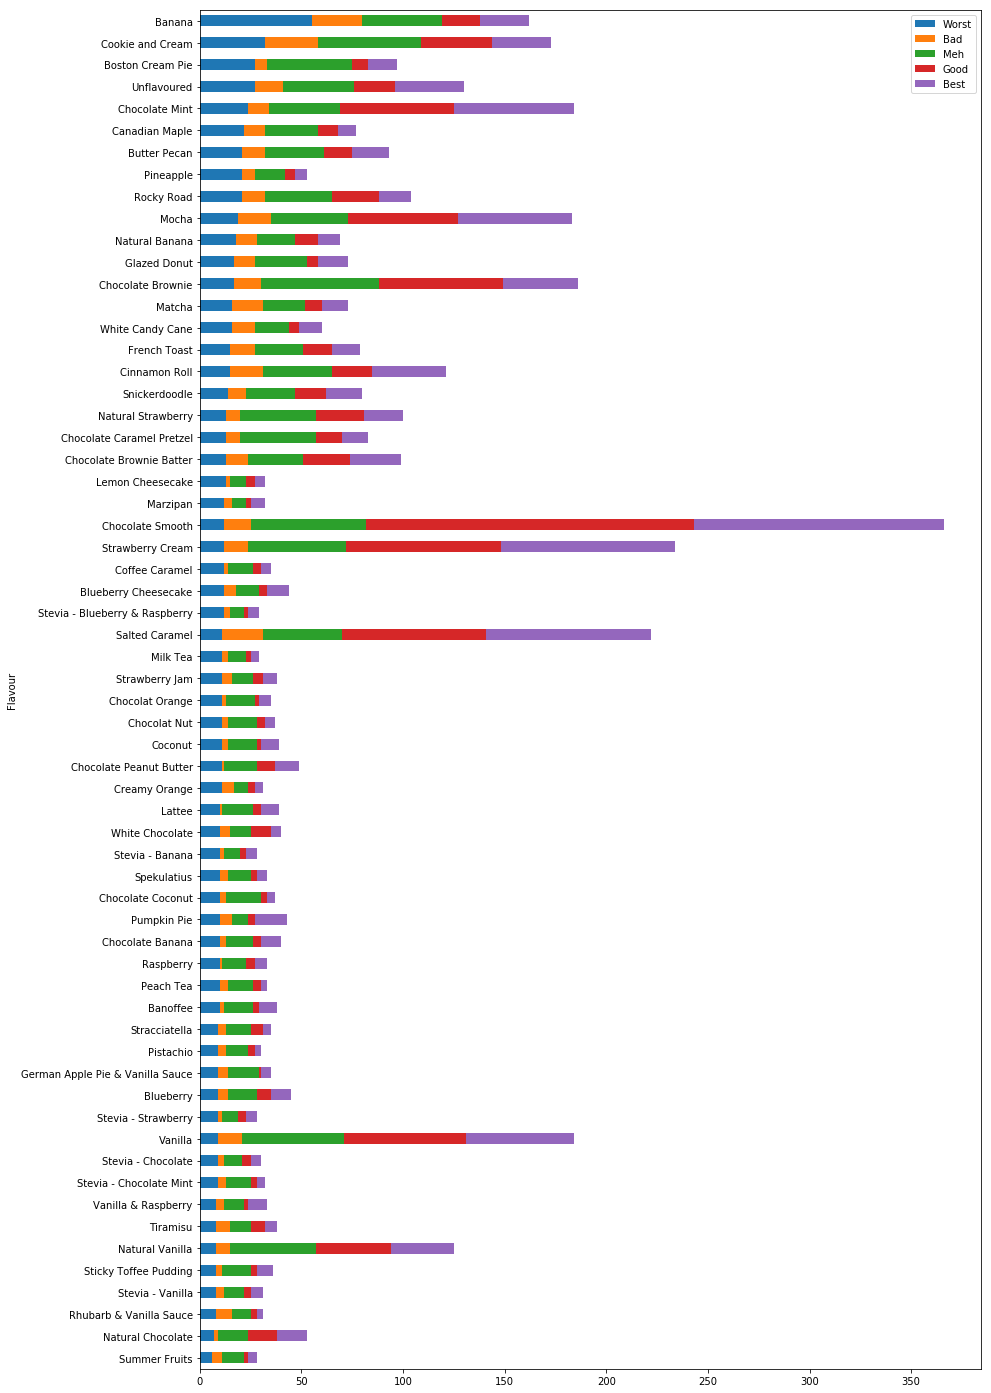

In [197]:
df.sort_values("Worst", ascending=True).pipe(plot)

In [198]:
_ = df.copy()

# Replace score names, with values per score (1 = worst, ... 5 = best)
_.columns = [1,2,3,4,5]

# Get total vote counts per flavour
totes = _.sum(axis=1)

_ = _.stack().reset_index()

# Multiply score vote counts, by score vaule
_['score'] = _['level_1'] * _[0]

# Sum scores by flavour, divide to get average
dfAvg = _.groupby('Flavour')['score'].sum() / totes

# Average score per flavour

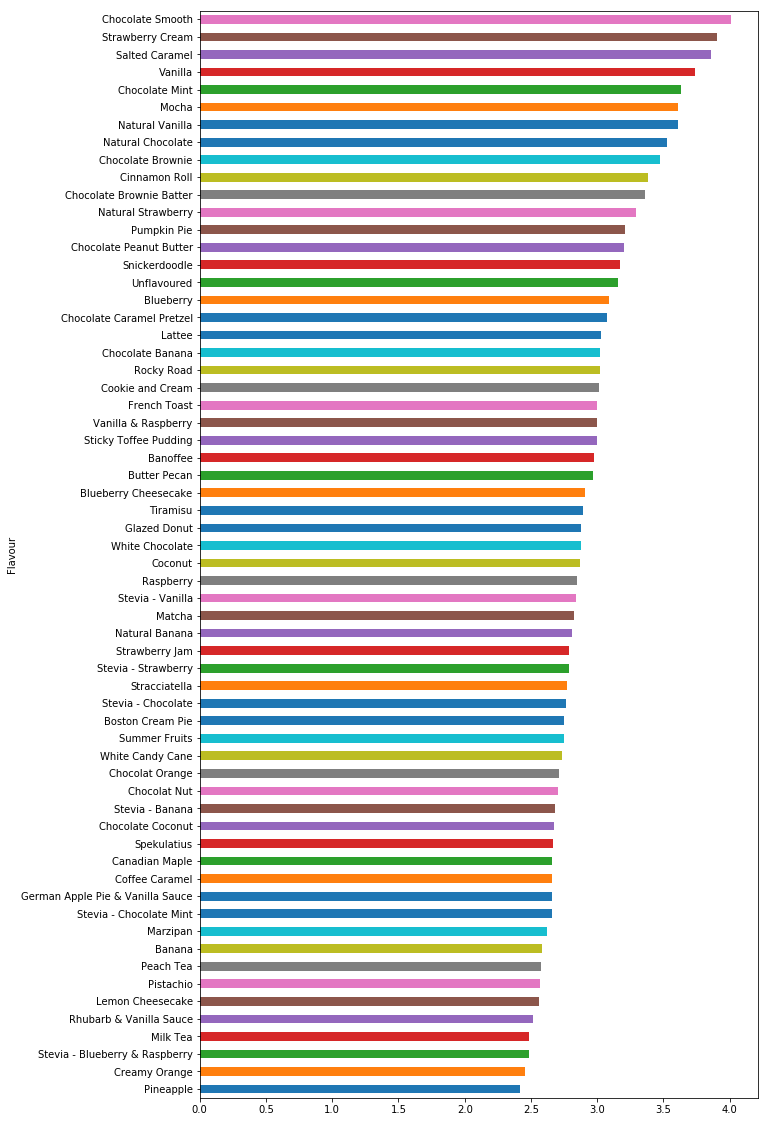

In [199]:
dfAvg.sort_values().plot.barh(figsize=(10,20))

# Flavours sorted by percentage of "Best" votes

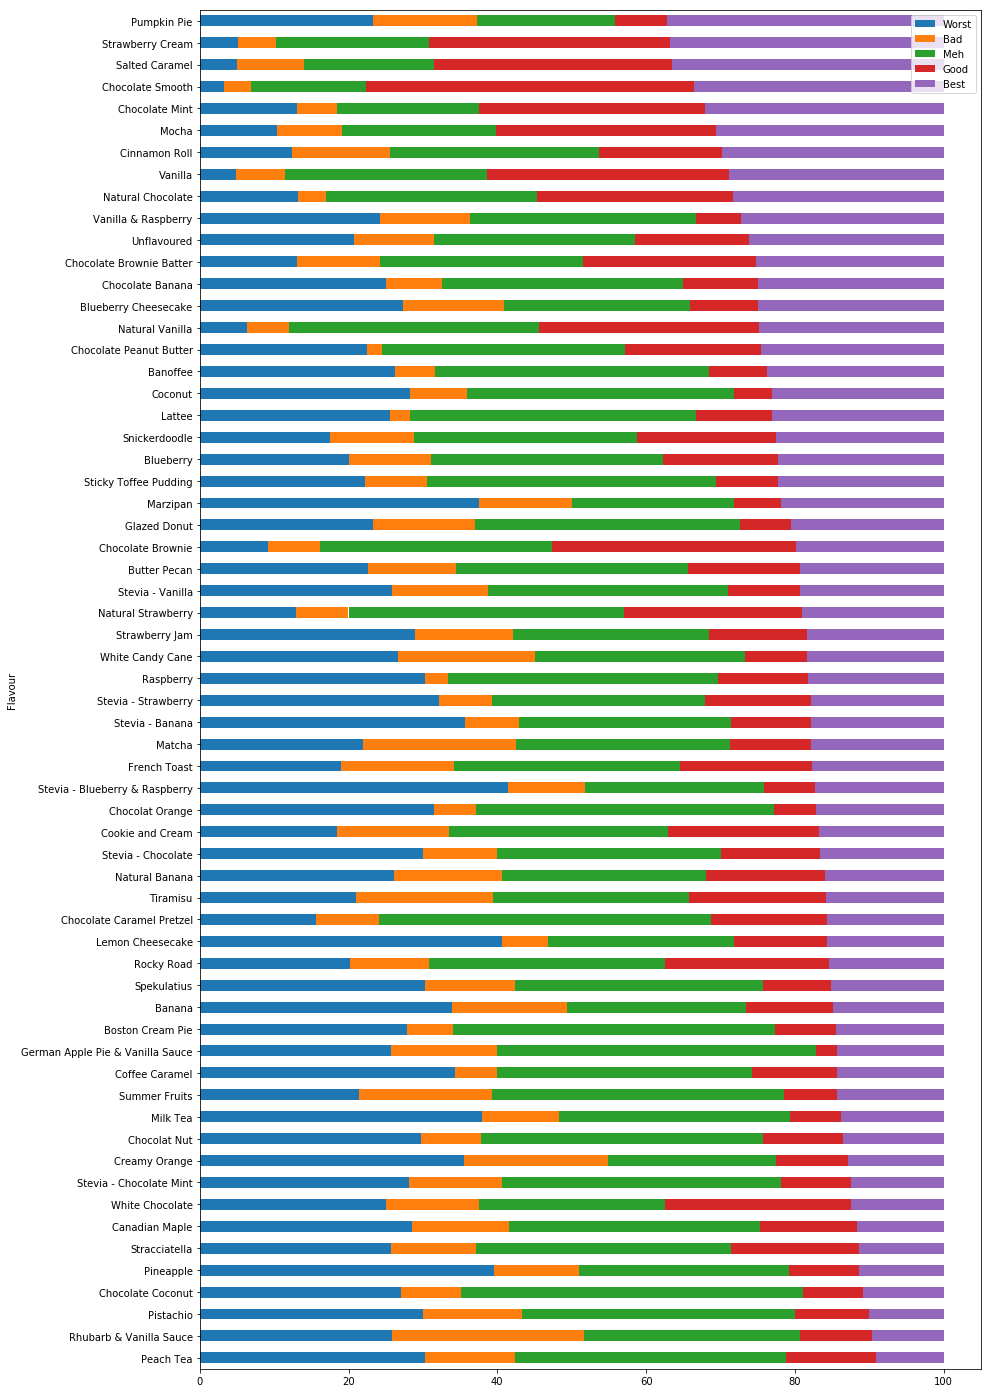

In [200]:
dfP = df.div(df.sum(axis=1), axis=0).mul(100)
dfP.sort_values("Best",ascending=True).pipe(plot)

# Flavours sorted by highest percent "Worst" votes

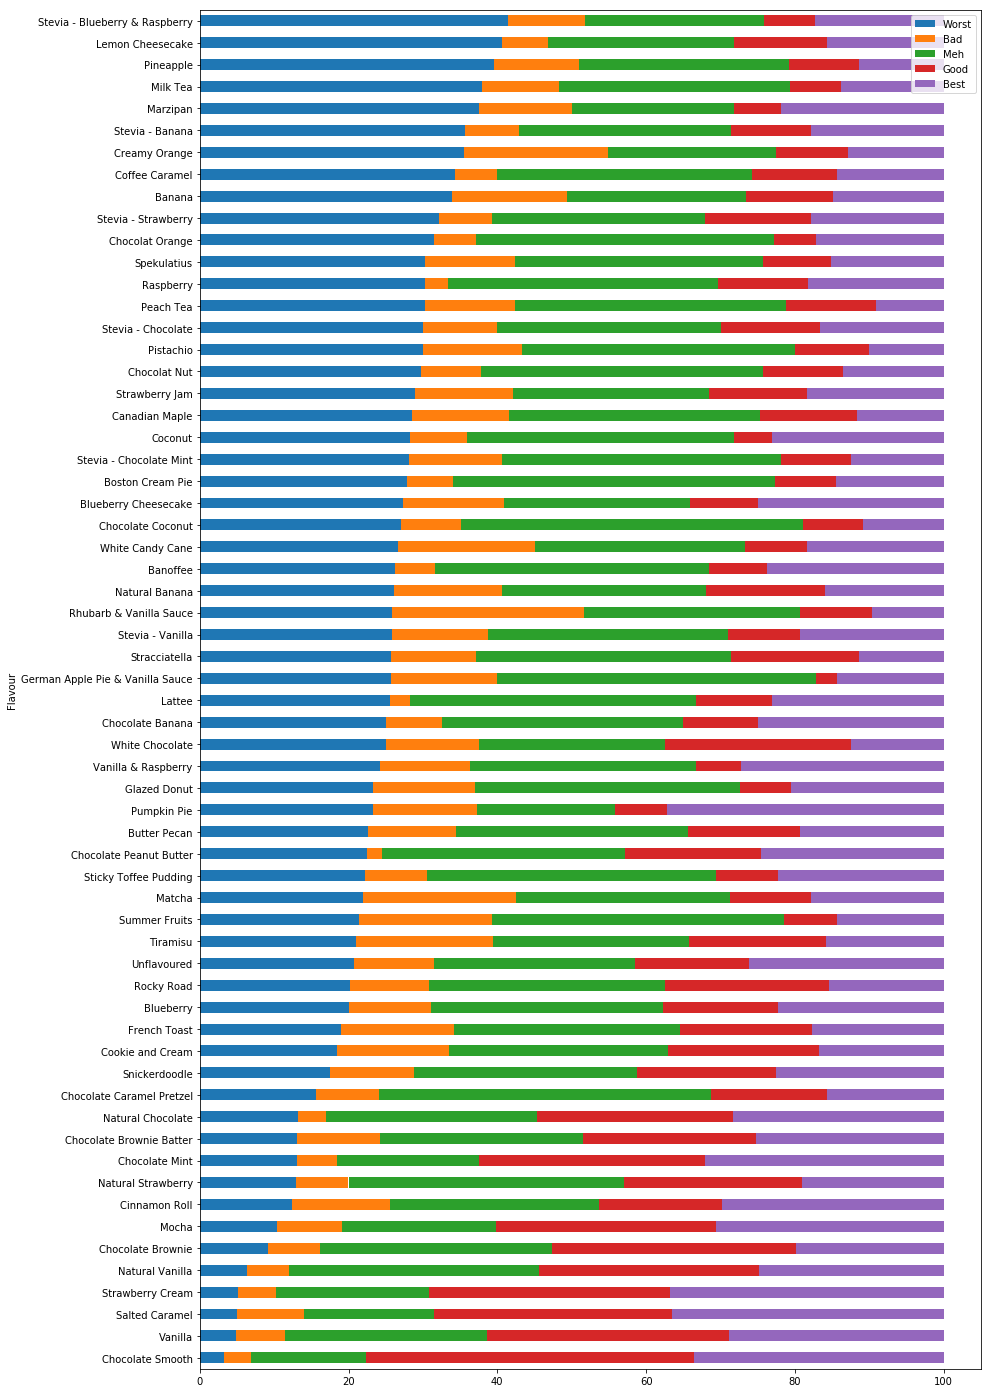

In [201]:
dfP = df.div(df.sum(axis=1), axis=0).mul(100)
dfP.sort_values("Worst",ascending=True).pipe(plot)